# IPL Data Analysis

Submitted by:
Shruthi Nemu Tandel (snt288), 
Samarthraj Balachandra Hegde(sh4636), 
Rakavee Anandan (ra2635)

In [116]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("PBDA Project") \
    .config("spark.some.config.option") \
    .getOrCreate()

In [117]:
df_deliveries = spark.read.csv("D:/ipl/deliveries.csv", header=True)
df_matches = spark.read.csv("D:/ipl/matches.csv", header=True)

In [118]:
#package imports
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [119]:
df_deliveries.show(2)

+--------+------+-------------------+--------------------+----+----+---------+-----------+--------+-------------+---------+--------+-----------+-----------+------------+------------+----------+----------+----------------+--------------+-------+
|match_id|inning|       batting_team|        bowling_team|over|ball|  batsman|non_striker|  bowler|is_super_over|wide_runs|bye_runs|legbye_runs|noball_runs|penalty_runs|batsman_runs|extra_runs|total_runs|player_dismissed|dismissal_kind|fielder|
+--------+------+-------------------+--------------------+----+----+---------+-----------+--------+-------------+---------+--------+-----------+-----------+------------+------------+----------+----------+----------------+--------------+-------+
|       1|     1|Sunrisers Hyderabad|Royal Challengers...|   1|   1|DA Warner|   S Dhawan|TS Mills|            0|        0|       0|          0|          0|           0|           0|         0|         0|            null|          null|   null|
|       1|     1|Sun

In [120]:
df_matches.show(2)

+---+------+---------+----------+-------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-------+
| id|season|     city|      date|              team1|               team2|         toss_winner|toss_decision|result|dl_applied|              winner|win_by_runs|win_by_wickets|player_of_match|               venue|       umpire1| umpire2|umpire3|
+---+------+---------+----------+-------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+--------------+--------+-------+
|  1|  2017|Hyderabad|2017-04-05|Sunrisers Hyderabad|Royal Challengers...|Royal Challengers...|        field|normal|         0| Sunrisers Hyderabad|         35|             0|   Yuvraj Singh|Rajiv Gandhi Inte...|   AY Dandekar|NJ Llong|   null|
|  2|  2017|     Pun

# Home Ground Wins Percentage

In [121]:
df2 = sqlContext.createDataFrame([("Royal Challengers Bangalore", "Bangalore"), ("Kolkata Knight Riders", "Kolkata"), ("Mumbai Indians", "Mumbai"), ("Sunrisers Hyderabad", "Hyderabad"), ("Delhi Daredevils", "Delhi"), ("Kings XI Punjab", "Chandigarh"), ("Kings XI Punjab", "Indore"), ("Kings XI Punjab", "Dharamsala"), ("Kochi Tuskers Kerala", "Kochi"), ("Rajasthan Royals", "Jaipur"),("Rajasthan Royals", "Ahmedabad"), ("Gujarat Lions", "Rajkot"), ("Rising Pune Supergiant", "Pune"),("Deccan Chargers", "Hyderabad"),("Deccan Chargers", "Cuttack"),("Deccan Chargers", "Nagpur"),("Deccan Chargers", "Visakhapatnam"),("Pune Warriors India", "Pune"), ("Chennai Super Kings", "Chennai"), ("Gujarat Lions", "Kanpur") ], ["winner", "city"])
second = df2.alias('second')
#second.show()
df1 = df_matches.filter(df_matches.city. isNotNull())
first = df1.alias('first')
#first.show()
joined = first.join(second,['winner','city'],"inner")
joined_output = joined.selectExpr("winner","city")
joined_output.registerTempTable("joined_output")
winner_home = joined_output.groupBy('winner','city').count()
winner_home1 = winner_home.selectExpr("winner as team", "city as home_city","count as total_wins")
#winner_home1.show()
third = df2.selectExpr("winner as team1", "city as city")
third = third.alias('third')
second_join = first.join(third,['team1','city'],"inner")
fourth = df2.selectExpr("winner as team2", "city as city")
fourth = fourth.alias('fourth')
third_join = first.join(fourth,['team2','city'],"inner")
#third_join.show()
total_matches_join = second_join.unionAll(third_join)
#total_matches_join.show()
total_matches_join.registerTempTable("total_matches_join")
total_home = total_matches_join.groupBy('team1','city').count()
total_home1 = total_home.selectExpr("team1 as team", "city as home_city","count as total_matches")
#total_home1.show()
final_join = total_home1.join(winner_home1,['team','home_city'],"inner")
final_join.show()

+--------------------+----------+-------------+----------+
|                team| home_city|total_matches|total_wins|
+--------------------+----------+-------------+----------+
|     Kings XI Punjab|    Indore|            4|         3|
|     Deccan Chargers| Hyderabad|           18|         3|
|     Kings XI Punjab|Dharamsala|            9|         5|
|Rising Pune Super...|      Pune|            7|         5|
|    Rajasthan Royals|    Jaipur|           33|        24|
|     Kings XI Punjab|Chandigarh|           46|        22|
|    Delhi Daredevils|     Delhi|           56|        23|
| Sunrisers Hyderabad| Hyderabad|           30|        20|
|     Deccan Chargers|   Cuttack|            4|         3|
|       Gujarat Lions|    Rajkot|           10|         3|
|     Deccan Chargers|    Nagpur|            3|         2|
|Kolkata Knight Ri...|   Kolkata|           58|        37|
| Chennai Super Kings|   Chennai|           47|        33|
|Kochi Tuskers Kerala|     Kochi|            5|         

In [122]:
result = final_join.withColumn('percentage', (final_join['total_wins']/final_join['total_matches']) * 100)
result.na.fill(0).show()
#result.registerTempTable("Percentage")

+--------------------+----------+-------------+----------+------------------+
|                team| home_city|total_matches|total_wins|        percentage|
+--------------------+----------+-------------+----------+------------------+
|     Kings XI Punjab|    Indore|            4|         3|              75.0|
|     Deccan Chargers| Hyderabad|           18|         3|16.666666666666664|
|     Kings XI Punjab|Dharamsala|            9|         5| 55.55555555555556|
|Rising Pune Super...|      Pune|            7|         5| 71.42857142857143|
|    Rajasthan Royals|    Jaipur|           33|        24| 72.72727272727273|
|     Kings XI Punjab|Chandigarh|           46|        22| 47.82608695652174|
|    Delhi Daredevils|     Delhi|           56|        23| 41.07142857142857|
| Sunrisers Hyderabad| Hyderabad|           30|        20| 66.66666666666666|
|     Deccan Chargers|   Cuttack|            4|         3|              75.0|
|       Gujarat Lions|    Rajkot|           10|         3|      

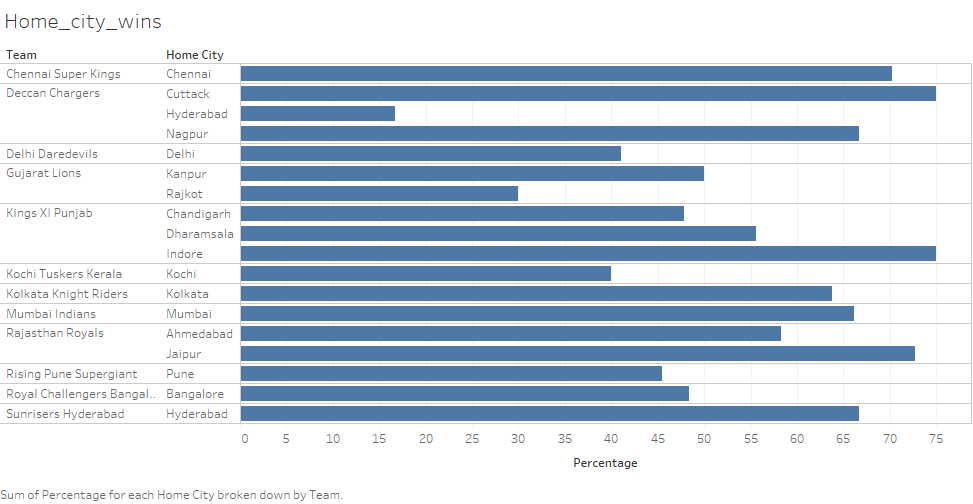

In [123]:
Image("C:\\Users\\rakav\\Desktop\\PBDAproject\\home_ground_wins.png")

# Analyzing which stadium is most suitable for batting first

In [124]:
#Filling missing values
df_matches.na.fill({'city': 'unknown', 'winner': 'draw', 'player_of_match': 'draw'})
df_deliveries.na.fill({'dismissal_kind': 'notout', 'player_dismissed': 'notout', 'fielder': 'notout'})

#Selecting required columns
df_bat_select= df_matches.select("toss_decision","win_by_runs","win_by_wickets","venue");

#Filtering on the basis of toss decision chosen as batting first
df_bat_first = df_bat_select.filter(((df_bat_select.win_by_runs > 0) | (df_bat_select.win_by_wickets > 0)) & (df_bat_select.toss_decision == 'bat'))

#Calculating total matches won at each stadium when the winning team chose to bat first.
total_wins_batFirst = df_bat_first.groupBy('venue').count()

total_wins_bat = total_wins_batFirst.selectExpr("venue as venue", "count as total_bat_wins")

batfirst = total_wins_bat.alias('batfirst')
#batfirst.show()

#Calculating total matches won at each stadium.

venue_select = df_matches.select("venue")
matches_at_venue = venue_select.groupBy('venue').count()
no_of_matches = matches_at_venue.selectExpr("venue as venue", "count as total_matches_won")
matches_count = no_of_matches.alias('matches_count')
#matches_count.show()

#Joining total matches won and total matches won by batting first at a venue
match_join_bat = matches_count.join(batfirst,['venue'],"outer")
#Filling null values
match_join_bat.na.fill(0)


DataFrame[venue: string, total_matches_won: bigint, total_bat_wins: bigint]

In [125]:
# Calculate winning percentage of first batting

win_percent = match_join_bat.withColumn('Percentage', (match_join_bat['total_bat_wins']/match_join_bat['total_matches_won']) * 100)
win_percent.na.fill(0).show()
#win_percent.registerTempTable("win_table")
#win_percentage = spark.sql("select venue, Percentage from win_table")

+--------------------+-----------------+--------------+------------------+
|               venue|total_matches_won|total_bat_wins|        Percentage|
+--------------------+-----------------+--------------+------------------+
|Dubai Internation...|                7|             3|42.857142857142854|
|Himachal Pradesh ...|                9|             1| 11.11111111111111|
|Sardar Patel Stad...|               12|             6|              50.0|
|Punjab Cricket As...|               35|            14|              40.0|
|    Barabati Stadium|                7|             2| 28.57142857142857|
|Punjab Cricket As...|               11|             2|18.181818181818183|
|       Nehru Stadium|                5|             2|              40.0|
|Maharashtra Crick...|               15|             2|13.333333333333334|
|        Eden Gardens|               61|            28| 45.90163934426229|
|     OUTsurance Oval|                2|             1|              50.0|
|M Chinnaswamy Sta...|   

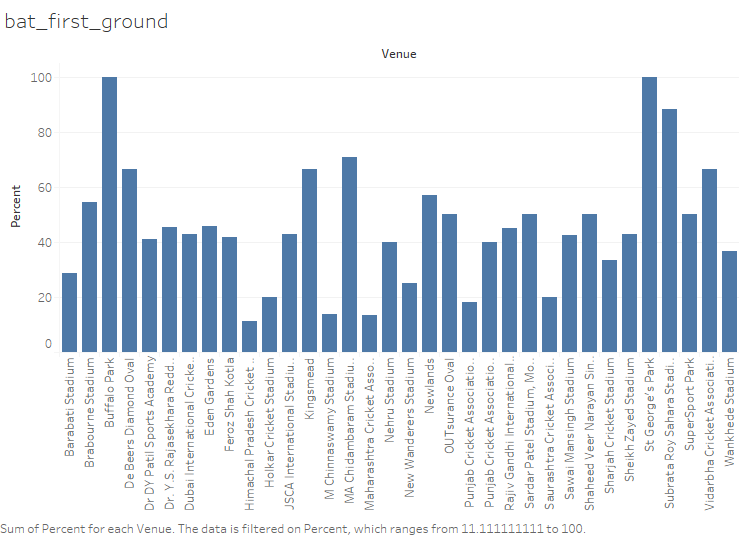

In [126]:
Image("C:\\Users\\rakav\\Desktop\\PBDAproject\\Bat_First.png")

# Analyzing which stadium is most suitable for fielding first

In [127]:
#Selecting required columns
df_field_select= df_matches.select("toss_decision","win_by_runs","win_by_wickets","venue");

#Filtering on the basis of toss decision chosen as fielding first
df_field_first = df_field_select.filter(((df_field_select.win_by_runs > 0) | (df_field_select.win_by_wickets > 0)) & (df_field_select.toss_decision == 'field'))

#Calculating total matches won at each stadium when the winning team chose to field first.

total_wins_fieldFirst = df_field_first.groupBy('venue').count()

total_wins_field = total_wins_fieldFirst.selectExpr("venue as venue", "count as total_field_wins")

fieldfirst = total_wins_field.alias('fieldfirst')
#fieldfirst.show()

#Joining total matches won and total matches won by batting first at a venue

match_join_field = matches_count.join(fieldfirst,['venue'],"outer")

#Filling null values

match_join_field.na.fill(0).show()

+--------------------+-----------------+----------------+
|               venue|total_matches_won|total_field_wins|
+--------------------+-----------------+----------------+
|Dubai Internation...|                7|               4|
|Himachal Pradesh ...|                9|               8|
|Sardar Patel Stad...|               12|               5|
|Punjab Cricket As...|               35|              21|
|    Barabati Stadium|                7|               5|
|Punjab Cricket As...|               11|               9|
|       Nehru Stadium|                5|               3|
|Maharashtra Crick...|               15|              13|
|        Eden Gardens|               61|              33|
|     OUTsurance Oval|                2|               1|
|M Chinnaswamy Sta...|               66|              54|
|    Feroz Shah Kotla|               60|              34|
|Rajiv Gandhi Inte...|               49|              26|
|   Brabourne Stadium|               11|               5|
|Vidarbha Cric

In [128]:
# Calculate winning percentage of first fielding

win_percent_field = match_join_field.withColumn('Percentage', (match_join_field['total_field_wins']/match_join_field['total_matches_won']) * 100)
win_percent_field.na.fill(0).show()
#win_percent_field.registerTempTable("win_field_table")
#win_field_percentage = spark.sql("select venue, Percentage from win_field_table")

+--------------------+-----------------+----------------+------------------+
|               venue|total_matches_won|total_field_wins|        Percentage|
+--------------------+-----------------+----------------+------------------+
|Dubai Internation...|                7|               4| 57.14285714285714|
|Himachal Pradesh ...|                9|               8| 88.88888888888889|
|Sardar Patel Stad...|               12|               5| 41.66666666666667|
|Punjab Cricket As...|               35|              21|              60.0|
|    Barabati Stadium|                7|               5| 71.42857142857143|
|Punjab Cricket As...|               11|               9| 81.81818181818183|
|       Nehru Stadium|                5|               3|              60.0|
|Maharashtra Crick...|               15|              13| 86.66666666666667|
|        Eden Gardens|               61|              33| 54.09836065573771|
|     OUTsurance Oval|                2|               1|              50.0|

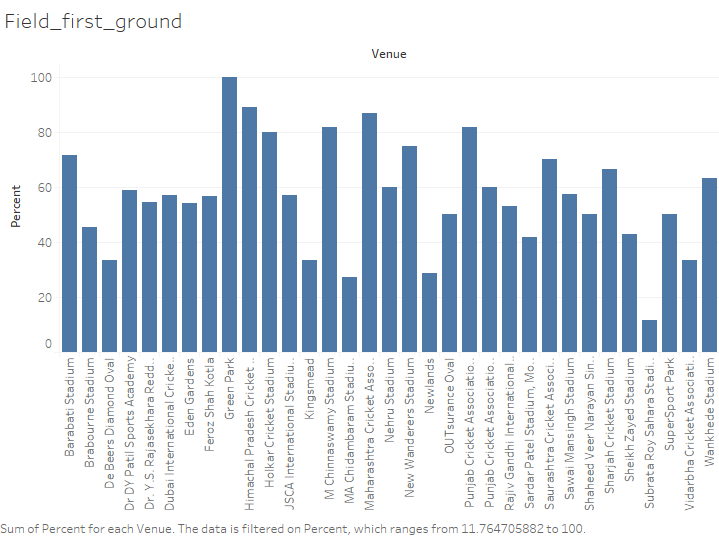

In [129]:
Image("C:\\Users\\rakav\\Desktop\\PBDAproject\\Field_first_ground.png")

# Impact of toss on the outcome of the match

In [130]:
#Filtering the null entries

df_matches_1 = df_matches.filter(df_matches.winner. isNotNull())

df_matches_2 = df_matches_1.filter(df_matches_1.toss_winner. isNotNull())

filtered_matches = df_matches_2.alias('filtered_matches')
filtered_matches.count()
# Finding the teams who won the toss also won the match

df_toss_match = filtered_matches[(filtered_matches.toss_winner == filtered_matches.winner)]
df_toss_match.count()


325

In [131]:
# Calculating no of matches won by toss winning team

no_of_wins = df_toss_match.groupBy('winner').count()
team_wins = no_of_wins.selectExpr("winner as team","count as win_count")
#team_wins.show()

# No of matches played by toss winning team1

matches_team1 = df_matches_2.groupBy('team1').count()
#matches_team1.show()

# No of matches played by toss winning team2

matches_team2 = df_matches_2.groupBy('team2').count()
#matches_team2.show()

# selecting no of  matches played by team 1 and team 2

team1_no_of_matches= matches_team1.selectExpr("team1 as team", "count as team1_count")
team2_no_of_matches = matches_team2.selectExpr("team2 as team","count as team2_count")

# Join matches played by team 1 and team 2

matches_team1_team2 = team1_no_of_matches.join(team2_no_of_matches,['team'],"inner")
#matches_team1_team2.show()

#Join no. of wins of each team with matches played by team 1 and team 2

team_win_final_count = team_wins.join(matches_team1_team2,['team'],"inner")
team_win_final_count.show()



+--------------------+---------+-----------+-----------+
|                team|win_count|team1_count|team2_count|
+--------------------+---------+-----------+-----------+
| Sunrisers Hyderabad|       17|         46|         30|
| Chennai Super Kings|       42|         77|         54|
|Rising Pune Super...|        5|          8|          8|
|     Deccan Chargers|       19|         43|         32|
|Kochi Tuskers Kerala|        4|          7|          7|
|    Rajasthan Royals|       34|         54|         63|
|       Gujarat Lions|       10|         14|         16|
|Royal Challengers...|       35|         69|         81|
|Kolkata Knight Ri...|       44|         68|         80|
|Rising Pune Super...|        3|          7|          7|
|     Kings XI Punjab|       28|         77|         71|
|       Pune Warriors|        3|         20|         25|
|    Delhi Daredevils|       33|         61|         84|
|      Mumbai Indians|       48|         82|         75|
+--------------------+---------

In [132]:
# Calculate the winning percentage of toss winning teams

toss_match_win_percent = team_win_final_count.withColumn('percentage', (team_win_final_count['win_count']/(team_win_final_count['team1_count'] + team_win_final_count['team2_count'])) * 100)
#toss_match_win_percent.show()

toss_match_win_percent.na.fill(0).show()

# registering the dataframe as table
#toss_match_win_percent.registerTempTable("Toss_Match_win_percent")
#toss_and_team_win = spark.sql("select team, percentage from Toss_Match_win_percent")
#toss_and_team_win.show()

+--------------------+---------+-----------+-----------+------------------+
|                team|win_count|team1_count|team2_count|        percentage|
+--------------------+---------+-----------+-----------+------------------+
| Sunrisers Hyderabad|       17|         46|         30| 22.36842105263158|
| Chennai Super Kings|       42|         77|         54| 32.06106870229007|
|Rising Pune Super...|        5|          8|          8|             31.25|
|     Deccan Chargers|       19|         43|         32|25.333333333333336|
|Kochi Tuskers Kerala|        4|          7|          7| 28.57142857142857|
|    Rajasthan Royals|       34|         54|         63|29.059829059829063|
|       Gujarat Lions|       10|         14|         16| 33.33333333333333|
|Royal Challengers...|       35|         69|         81|23.333333333333332|
|Kolkata Knight Ri...|       44|         68|         80| 29.72972972972973|
|Rising Pune Super...|        3|          7|          7|21.428571428571427|
|     Kings 

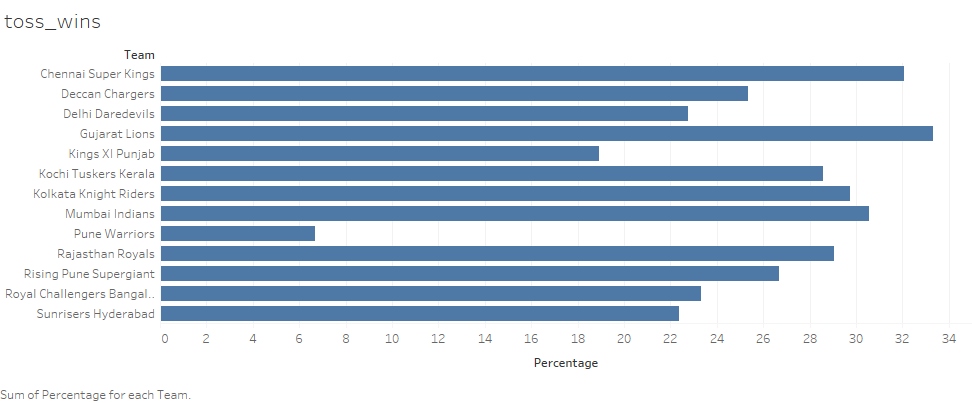

In [133]:
Image("C:\\Users\\rakav\\Desktop\\PBDAproject\\toss.png")

# Basic Data Analysis

In [134]:
deliveries = df_deliveries.toPandas()
matches = df_matches.toPandas()

In [135]:
#Total Number of Matches Played by a team
teams = matches.team1.append(matches.team2)
teams_df = pd.DataFrame(teams)
teams_df.columns = ['team']
count_match_series = teams_df.groupby(teams_df.team).team.count()
count_match_df = pd.DataFrame(count_match_series)
count_match_df.columns = ['countplayed']
count_match_df.reset_index(inplace=True)
count_match_df.sort_values('team')
team_sorted = count_match_df.team
played_sorted = count_match_df.countplayed
count_match_df

,team,countplayed
0,Chennai Super Kings,131
1,Deccan Chargers,75
2,Delhi Daredevils,147
3,Gujarat Lions,30
4,Kings XI Punjab,148
5,Kochi Tuskers Kerala,14
6,Kolkata Knight Riders,148
7,Mumbai Indians,157
8,Pune Warriors,46
9,Rajasthan Royals,118


In [136]:
#Total Number of Matches won by a team
winner_series = matches.groupby(matches.winner).winner.count()
winner_df = pd.DataFrame(winner_series)
winner_df.columns = ['countwin']
winner_df.reset_index(inplace=True)
win_sorted = winner_df.countwin
winner_df

,winner,countwin
0,Chennai Super Kings,79
1,Deccan Chargers,29
2,Delhi Daredevils,62
3,Gujarat Lions,13
4,Kings XI Punjab,70
5,Kochi Tuskers Kerala,6
6,Kolkata Knight Riders,77
7,Mumbai Indians,92
8,Pune Warriors,12
9,Rajasthan Royals,63


In [137]:
#Total Number of Matches lost by a team
total_losses = played_sorted - win_sorted
loss_df = pd.DataFrame(total_losses)
team_df = pd.DataFrame(team_sorted)
loss_df = pd.concat((loss_df,team_df),axis=1)
loss_df.columns = ['loss_count','team']
loss_df.sort_values('loss_count',ascending=False)
loss_df

,loss_count,team
0,52,Chennai Super Kings
1,46,Deccan Chargers
2,85,Delhi Daredevils
3,17,Gujarat Lions
4,78,Kings XI Punjab
5,8,Kochi Tuskers Kerala
6,71,Kolkata Knight Riders
7,65,Mumbai Indians
8,34,Pune Warriors
9,55,Rajasthan Royals


In [ ]:
#matches = pd.read_csv('D:/ipl/matches.csv')
#deliveries = pd.read_csv('D:/ipl/deliveries.csv')
matches["type"] = "pre-qualifier"
for year in range(2008, 2017):
   final_match_index = matches[matches['season']==year][-1:].index.values[0]
   matches = matches.set_value(final_match_index, "type", "final")
   matches = matches.set_value(final_match_index-1, "type", "qualifier-2")
   matches = matches.set_value(final_match_index-2, "type", "eliminator")
   matches = matches.set_value(final_match_index-3, "type", "qualifier-1")

matches.groupby(["type"])["id"].count()
matches.head()

team_score = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_score.columns = ['match_id', 'Team1_score', 'Team2_score', 'Team1_superover_score', 'Team2_superover_score']
matches_agg = pd.merge(matches, team_score, left_on = 'id', right_on = 'match_id', how = 'outer')

team_extras = deliveries.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg = pd.merge(matches_agg, team_extras, on = 'match_id', how = 'outer')

#Reorder the columns to make the data more readable
cols = ['match_id', 'season','city','date','team1','team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'Team1_score','Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score', 'Team2_superover_score', 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'type', 'venue', 'umpire1', 'umpire2', 'umpire3']
matches_agg = matches_agg[cols]
#matches_agg.head(2)

More Analysis

# No. of wins by team and season in each city

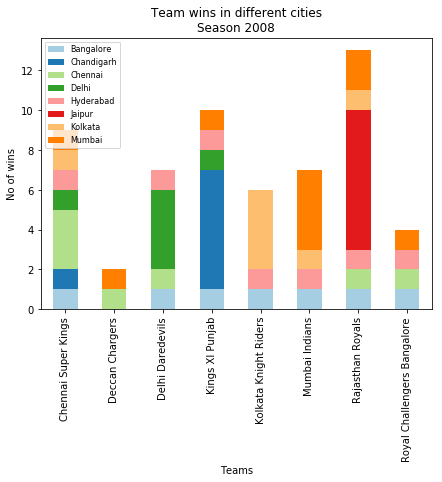

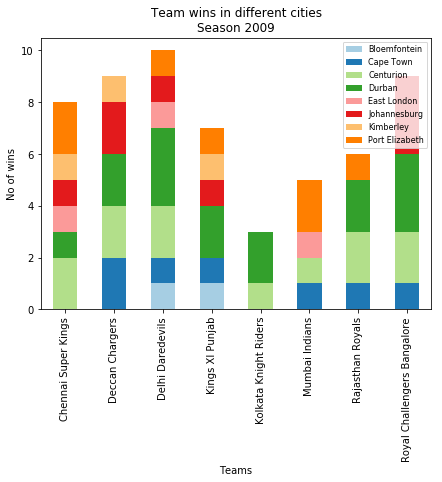

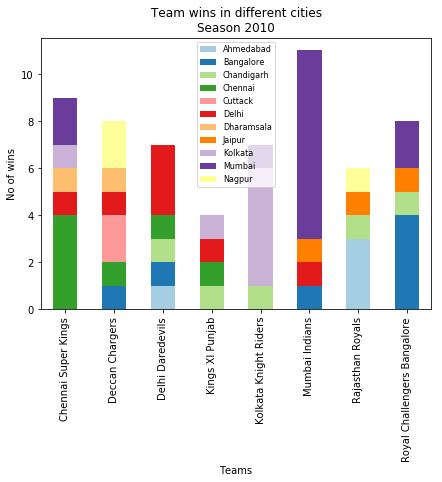

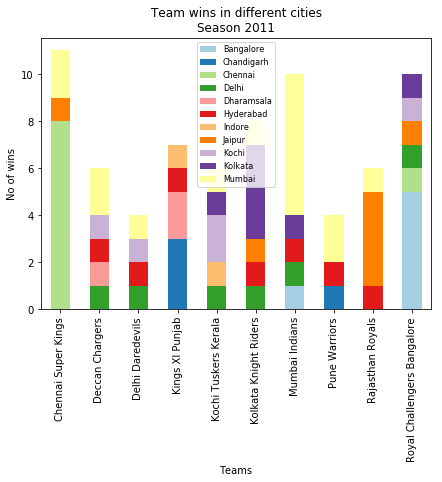

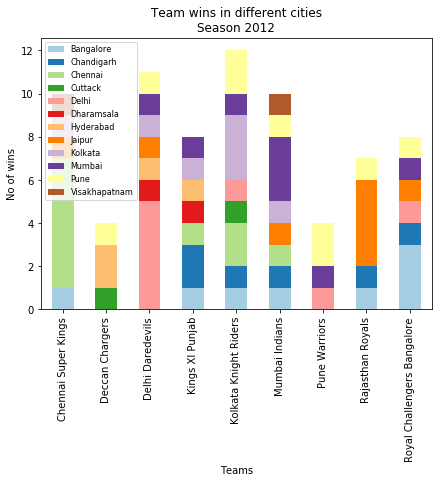

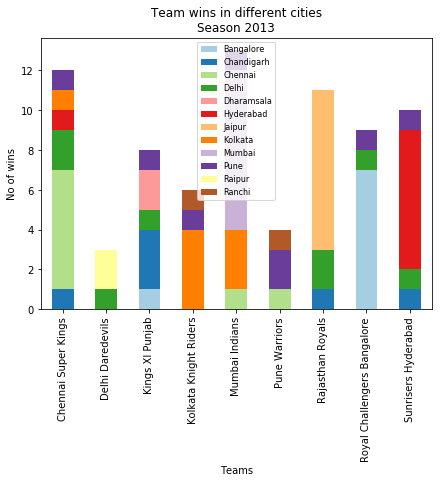

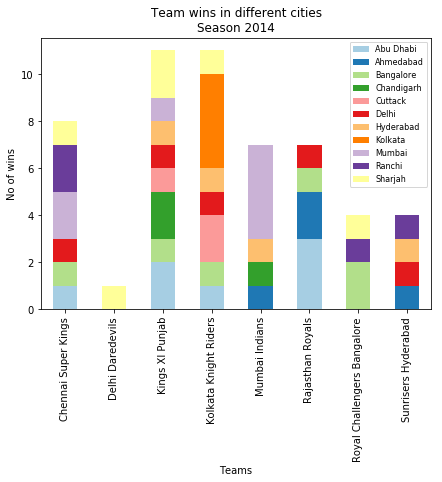

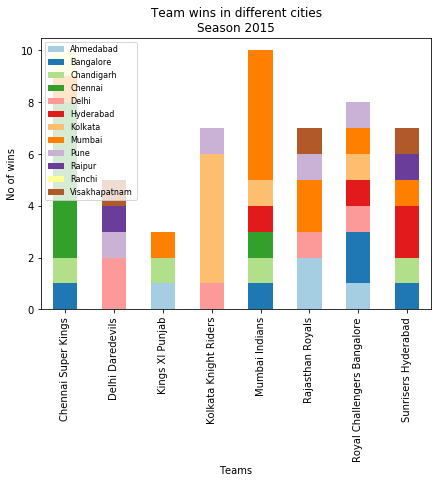

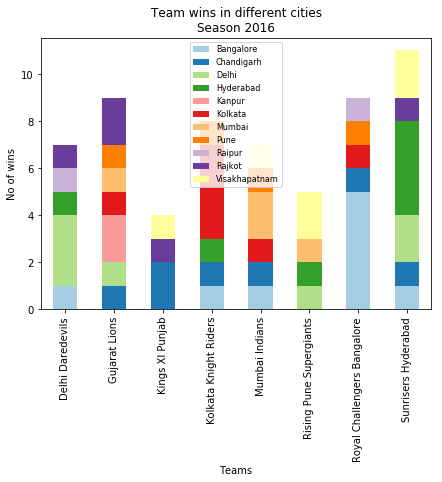

In [139]:
import seaborn as sns
#No. of wins by team and season in each city
x, y = 2008, 2017
while x < y:
    wins_percity = matches_agg[matches_agg['season'] == x].groupby(['winner', 'city'])['match_id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches_agg['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

# Top 5 batsmen over the seasons

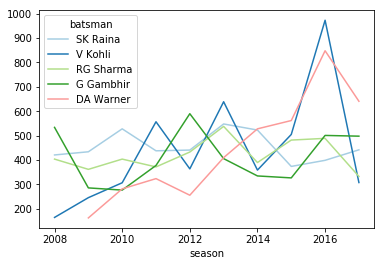

In [140]:
batsman_runsperseason = batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1) #add total column to find batsman with the highest runs
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:5].T.plot()

# Batsmen Aggregate

In [141]:
batsman_grp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = deliveries[ deliveries["batsman_runs"] == 4]
sixes = deliveries[ deliveries["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(2)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh


# Bowler Aggregate

In [142]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(2)

,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1,1,Royal Challengers Bangalore,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,Royal Challengers Bangalore,S Aravind,3,0,0,36,0,0.0,12.00


# Top Bowlers over the seasons

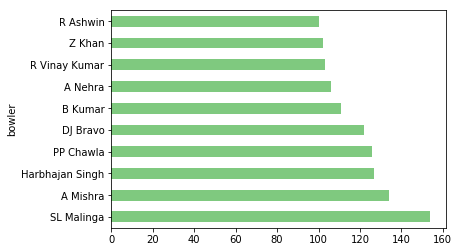

In [143]:
bowlers_wickets = bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending = False, inplace = True)
bowlers_wickets[:10].plot(x= 'bowler', y = 'runs', kind = 'barh', colormap = 'Accent')

# Man of the Match

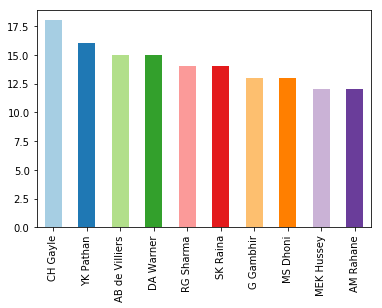

In [144]:
matches['player_of_match'].value_counts()[:10].plot(kind = 'bar')

# Wicket Distribution in different overs

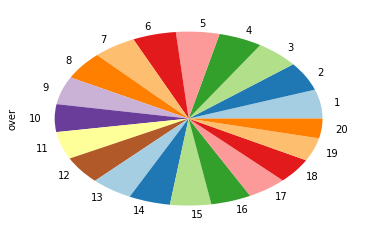

In [145]:
condition = (deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]
df.groupby([df.over]).over.count().plot(kind='pie')

# Runs Distribution in different overs

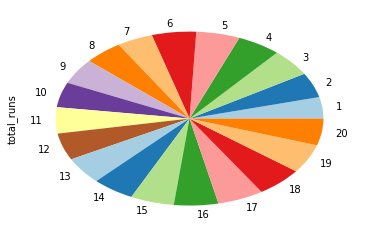

In [146]:
deliveries.groupby([deliveries.over]).total_runs.sum().plot(kind='pie')

# Centuries scored

In [147]:
runs_series = deliveries.groupby([deliveries.match_id,deliveries.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df = runs_df.reset_index()
condition = runs_df.total_runs >= 100
player_100df = runs_df.loc[condition,:]
player_100df.groupby(player_100df.batsman).total_runs.count().sort_values(ascending=False).head(5)

batsman
CH Gayle          7
V Kohli           5
V Sehwag          3
AB de Villiers    3
SK Raina          3
Name: total_runs, dtype: int64

# Top Batsmen over the seasons

In [148]:
combined = deliveries.set_index('match_id').join(matches.set_index('id'),how='inner')
runs_series = combined.groupby([combined.season,combined.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df.reset_index(inplace=True)
condition = runs_df.season == 2016
runs_df.loc[condition,:].sort_values('total_runs',ascending=False).head(5)

,season,batsman,total_runs
1383,2016,V Kohli,998
1278,2016,DA Warner,884
1256,2016,AB de Villiers,714
1357,2016,S Dhawan,523
1288,2016,G Gambhir,520


# Top Wickets over the seasons

In [149]:
condition = (combined.dismissal_kind != 'run out')&(combined.dismissal_kind != 'retired hurt')&(combined.dismissal_kind != 'notout')
df = combined.loc[condition,:]
wicket_series = df.groupby([df.season,df.bowler]).non_striker.count()
wicket_df = pd.DataFrame(wicket_series)
wicket_df.reset_index(inplace=True)
condition = wicket_df.season == 2016
wicket_df.loc[condition,:].sort_values('non_striker',ascending=False).head(5)

,season,bowler,non_striker
939,2016,B Kumar,413
992,2016,Mustafizur Rahman,374
1019,2016,SR Watson,357
949,2016,DJ Bravo,346
987,2016,MJ McClenaghan,331


# Top Bowlers in terms of Economy

In [150]:
#Filtering bowlers according to season
condition = combined.season == 2015
df = combined.loc[condition,:]
#Filtering bowlers that bowled minimum 60 balls
bowler_series = df.groupby([df.bowler]).total_runs.count()
bowler_df = pd.DataFrame(bowler_series)
bowler_df.columns = ['balls']
bowler_df = bowler_df.loc[bowler_df.balls >= 60,:]
condition = df.bowler.isin(bowler_df.index)
df2 = df.loc[condition,:]
df3 = pd.DataFrame(df2.groupby([df2.bowler]).total_runs.mean().sort_values().head(10))
df3.columns = ['Economy']
df3.reset_index()

,bowler,Economy
0,R Ashwin,0.954167
1,Z Khan,1.025806
2,MC Henriques,1.044586
3,MA Starc,1.125000
4,Sandeep Sharma,1.154341
5,GB Hogg,1.165354
6,A Nehra,1.176623
7,JP Duminy,1.196262
8,SL Malinga,1.198413
9,S Aravind,1.200000
